# Import necessary modules

In [ ]:
from keras import datasets
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
import numpy as np

# CIFAR-100 coarse label names (20 superclasses)

In [ ]:
labels = {
    0: "aquatic mammals",
    1: "fish",
    2: "flowers",
    3: "food containers",
    4: "fruit and vegetables",
    5: "household electrical devices",
    6: "household furniture",
    7: "insects",
    8: "large carnivores",
    9: "large man-made outdoor things",
    10: "large natural outdoor scenes",
    11: "large omnivores and herbivores",
    12: "medium-sized mammals",
    13: "non-insect invertebrates",
    14: "people",
    15: "reptiles",
    16: "small mammals",
    17: "trees",
    18: "vehicles 1",
    19: "vehicles 2"
}

# Display loaded data

In [ ]:
def display_image(img_set, title_set):
  n = len(img_set)
  for i in range(n):
    plt.subplot(3, 3, i+1)
    plt.imshow(img_set[i])
    plt.title(labels[title_set[i].item()])
    plt.axis('off')
  plt.tight_layout()
  plt.show()
  plt.close()

# CIFAR-100 coarse label names

# Load CIFAR-100 dataset (20 super classes)

trainX.shape: (50000, 32, 32, 3), trainY.shape: (50000, 1), testX.shape: (10000, 32, 32, 3), testY.shape: (10000, 1)
trainX.dtype: uint8, trainY.dtype: int64, testX.dtype: uint8, testY.dtype: int64
Train labels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


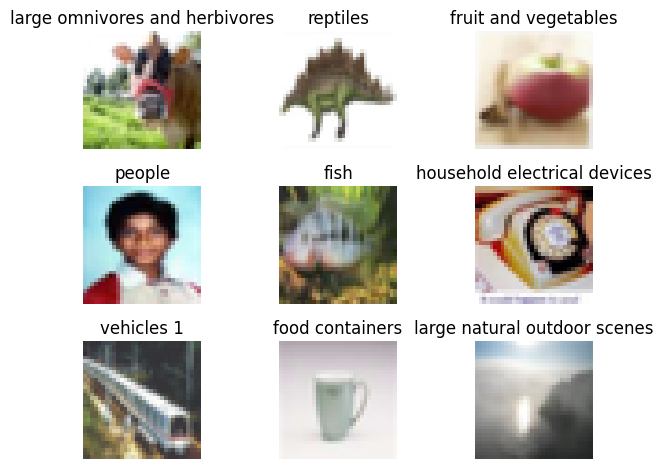

In [ ]:
(trainX, trainY), (testX, testY) = datasets.cifar100.load_data(label_mode='coarse')
print('trainX.shape: {}, trainY.shape: {}, testX.shape: {}, testY.shape: {}'.format(trainX.shape, trainY.shape, testX.shape, testY.shape))
print('trainX.dtype: {}, trainY.dtype: {}, testX.dtype: {}, testY.dtype: {}'.format(trainX.dtype, trainY.dtype, testX.dtype, testY.dtype))
print("Train labels:", np.unique(trainY))
display_image(trainX[0:9], trainY[0:9])

 # Build a CNN Classifier Based on a Pre-trained MobileNet Model

In [ ]:
mobilenet_model = MobileNet(input_shape=(32, 32, 3), weights='imagenet', include_top=False)
mobilenet_model.trainable = False

inputs = mobilenet_model.inputs
x = mobilenet_model.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
outputs = Dense(20, activation='softmax')(x)
model = Model(inputs, outputs, name='NewMobileNetMOdel')
model.summary(show_trainable=True)

<ipython-input-13-b39e298eebd2>:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  mobilenet_model = MobileNet(input_shape=(32, 32, 3), weights='imagenet', include_top=False)


Model: "NewMobileNetMOdel"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━┓
┃ Layer (type)                ┃ Output Shape          ┃    Param # ┃ Trai… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━┩
│ input_layer_2 (InputLayer)  │ (None, 32, 32, 3)     │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv1 (Conv2D)              │ (None, 16, 16, 32)    │        864 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv1_bn                    │ (None, 16, 16, 32)    │        128 │   N   │
│ (BatchNormalization)        │                       │            │       │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv1_relu (ReLU)           │ (None, 16, 16, 32)    │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv_dw_1 (DepthwiseConv2D) │ (None, 16, 16, 32)    │        288 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv_dw_1_bn                │ (None, 16, 16, 32)    │        128 │   N   │
│ (BatchNormalization)        │                       │            │       │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv_dw_1_relu (ReLU)       │ (None, 16, 16, 32)    │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv_pw_1 (Conv2D)          │ (None, 16, 16, 64)    │      2,048 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv_pw_1_bn                │ (None, 16, 16, 64)    │        256 │   N   │
│ (BatchNormalization)        │                       │            │       │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv_pw_1_relu (ReLU)       │ (None, 16, 16, 64)    │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv_pad_2 (ZeroPadding2D)  │ (None, 17, 17, 64)    │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv_dw_2 (DepthwiseConv2D) │ (None, 8, 8, 64)      │        576 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv_dw_2_bn                │ (None, 8, 8, 64)      │        256 │   N   │
│ (BatchNormalization)        │                       │            │       │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv_dw_2_relu (ReLU)       │ (None, 8, 8, 64)      │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv_pw_2 (Conv2D)          │ (None, 8, 8, 128)     │      8,192 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv_pw_2_bn                │ (None, 8, 8, 128)     │        512 │   N   │
│ (BatchNormalization)        │                       │            │       │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv_pw_2_relu (ReLU)       │ (None, 8, 8, 128)     │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv_dw_3 (DepthwiseConv2D) │ (None, 8, 8, 128)     │      1,152 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv_dw_3_bn                │ (None, 8, 8, 128)     │        512 │   N   │
│ (BatchNormalization)        │                       │            │       │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv_dw_3_relu (ReLU)       │ (None, 8, 8, 128)     │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv_pw_3 (Conv2D)          │ (None, 8, 8, 128)     │     16,384 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv_pw_3_bn                │ (None, 8, 8, 128)     │        512 │   N 

 Total params: 3,763,924 (14.36 MB)

 Trainable params: 535,060 (2.04 MB)

 Non-trainable params: 3,228,864 (12.32 MB)

In [ ]:
# Turn y into one-hot-encoding, so that we can use 20 neurons in the output layer
trainY = to_categorical(trainY, num_classes = 20)
testY = to_categorical(testY, num_classes = 20)

model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.fit(trainX, trainY, batch_size = 32, validation_split = 0.1, epochs = 10)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_178']
Received: inputs=Tensor(shape=(None, 32, 32, 3))
  warnings.warn(msg)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.0909 - loss: 2.9307 - val_accuracy: 0.1080 - val_loss: 2.8799
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.1116 - loss: 2.8771 - val_accuracy: 0.1102 - val_loss: 2.8665
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.1158 - loss: 2.8665 - val_accuracy: 0.1172 - val_loss: 2.8703
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.1158 - loss: 2.8626 - val_accuracy: 0.1120 - val_loss: 2.8712
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.1188 - loss: 2.8548 - val_accuracy: 0.1200 - val_loss: 2.8647
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.1214 - loss: 2.8506 - val_accuracy: 0.1202 - val_loss: 2.8671
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.1222 - loss: 2.8426 - val_accuracy: 0.1182 - val_loss: 2.8769
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.1205 - loss: 2.8446 - val_a

In [ ]:
model.evaluate(testX, testY)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.1045 - loss: 2.8888


[2.877492666244507, 0.10909999907016754]